This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [104]:
%matplotlib inline
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
from scipy.stats import t
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats.distributions as dist # load libraries

In [3]:
df = pd.read_csv("nhanes_2015_2016.csv")
df.head() # data preview

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
df.shape # dataframe dimensions

(5735, 28)

In [5]:
df.keys() # columns names

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

$$
H_0: p_m - p_f = 0
$$

In [6]:
df['SMQ020x'] = df.SMQ020.replace({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})
df['RIAGENDRx'] = df.RIAGENDR.replace({1: 'Male', 2: 'Female'})

In [7]:
smokers_prop = (df.SMQ020x == 'Yes').mean()
smokers_prop # smokers proportion; common proportion - p hat

0.404359197907585

In [8]:
updated_df = df.loc[:, ['SMQ020x', 'RIAGENDRx']] # updated dataframe

In [9]:
updated_df.head() # dataframe preview

,SMQ020x,RIAGENDRx
0,Yes,Male
1,Yes,Male
2,Yes,Male
3,No,Female
4,No,Female


In [10]:
male_df = updated_df.loc[df['RIAGENDRx'] == 'Male'] # males dataframe

In [11]:
n1 = len(male_df)
n1 # large sample size to assume that the distribution of our estimate is normal

2759

In [29]:
(male_df.SMQ020x == 'Yes').sum()

1413

In [12]:
male_smokers_prop = (male_df.SMQ020x == 'Yes').mean()
male_smokers_prop # best estimate - p hat males

0.5121420804639362

In [13]:
female_df = updated_df.loc[df['RIAGENDRx'] == 'Female'] # females dataframe

In [14]:
n2 = len(female_df)
n2 # large sample size to assume that the distribution of our estimate is norma

2976

In [22]:
(female_df.SMQ020x == 'Yes').sum()

906

In [15]:
female_smokers_prop = (female_df.SMQ020x == 'Yes').mean()
female_smokers_prop # best estimate - p hat females

0.30443548387096775

In [16]:
diff = male_smokers_prop - female_smokers_prop
diff # difference between proportions

0.20770659659296842

Test Statistic Calculation

$$
\frac{Best~Estimate - Hypothesized~Estimate}{Standard~Error~of~Estimate}
$$

In [17]:
se_phat = np.sqrt((smokers_prop * (1 - smokers_prop)) * (1/n1 + 1/n2))
se_phat # standard error of estimate

0.012970307741140625

In [18]:
z = diff/se_phat
z # test statistic

16.01400681759787

Our observed difference in sampe proportions is $16.01$ estimated standard errors below our hypothesized mean of equal population proportions. 

In [20]:
p_value = (1 - dist.norm.cdf(z)) * 2 
p_value # z statistic is distributed according to a standard normal distribution

0.0

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

Since $p-value < 0.05$ we reject the null hypothesis 

$$
H_0: p_m - p_f = 0
$$

**There is a significant difference in the proportion of men and women who smoke.**

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [43]:
z_multiplier = scipy.stats.norm.ppf(0.975)
z_multiplier # ~ 1.96

1.959963984540054

### CI(95%) for  Proportion of Women who Smoke

In [26]:
lower_bound = female_smokers_prop - 1.96 * np.sqrt(female_smokers_prop * (1 - female_smokers_prop)/n2)
upper_bound = female_smokers_prop + 1.96 * np.sqrt(female_smokers_prop * (1 - female_smokers_prop)/n2)
lower_bound, upper_bound # confidence interval for the proportion of female smokers

(0.2879023206749516, 0.3209686470669839)

In [27]:
sm.stats.proportion_confint(904, 2759) # using statsmodels library to calculate CI(95%)

(0.2872408635939692, 0.3202860181264609)

### CI(95%) for  Proportion of Men who Smoke

In [28]:
lower_bound = male_smokers_prop - 1.96 * np.sqrt(male_smokers_prop * (1 - male_smokers_prop)/n1)
upper_bound = male_smokers_prop + 1.96 * np.sqrt(male_smokers_prop * (1 - male_smokers_prop)/n1)
lower_bound, upper_bound # confidence interval for the proportion of male smokers

(0.4934902211293819, 0.5307939397984904)

In [30]:
sm.stats.proportion_confint(1413, 2976) # using statsmodels library to calculate CI(95%)

(0.45685727867885173, 0.49273949551469665)

### CI(95%) for Difference in the Population Proportion of Males and Females who Smoke

In [41]:
se_diff = np.sqrt(female_smokers_prop * (1 - female_smokers_prop)/n2) + np.sqrt(male_smokers_prop * (1 - male_smokers_prop)/n1)
se_diff # standard error of prop difference 

0.01795154210743389

In [42]:
proportion_difference = male_smokers_prop - female_smokers_prop
proportion_difference # difference between proportions

0.20770659659296842

In [40]:
lower_bound = proportion_difference - 1.96 * se_diff
upper_bound = proportion_difference + 1.96 * se_diff
lower_bound, upper_bound # confidence interval for the diff in population proportions

(0.172521574062398, 0.24289161912353885)

__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

The confidence interval for the difference between proportions is

$$
(0.172521574062398, 0.24289161912353885)
$$

as we see doesn't contain $0$ which supports our original hypothesis that the difference is significantly different from zero. 

Also the $CI_{95\%}$ for both proportions of males and females smokers don't overlap, suggesting that there is a significative difference between proportions.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

$$
H_0: \bar{x}_1 - \bar{x}_2 = 0
$$

In [48]:
df['DMDEDUC2'].unique() # unique values of DMDEDUC2 column

array([ 5.,  3.,  4.,  2., nan,  1.,  9.])

In [63]:
graduated_df = df.loc[df["DMDEDUC2"] == 5] # graduated college dataframe
n1 = len(graduated_df) 
n1 # no. of graduated people

1366

In [64]:
not_graduated_df = df[[x in [1,2,3,4] for x in df["DMDEDUC2"]]] # not graduated college dataframe
n2 = len(not_graduated_df)
n2 # no. of non-graduated people

4105

In [56]:
height_college_grads = graduated_college['BMXHT'].dropna() 
height_college_grads # heights data (in centimeters)

0       184.5
3       160.9
10      176.7
13      164.1
14      183.8
        ...  
5724    166.9
5725    180.9
5729    136.5
5731    182.2
5734    165.0
Name: BMXHT, Length: 1355, dtype: float64

In [57]:
height_non_college_grads = not_graduated_college['BMXHT'].dropna()
height_non_college_grads # heights data (in centimeters)

1       171.4
2       170.1
4       164.9
5       150.0
6       165.4
        ...  
5727    151.9
5728    164.9
5730    165.8
5732    152.2
5733    173.3
Name: BMXHT, Length: 4059, dtype: float64

Test Statistic Calculation

$\qquad$ **Pooled approach**

$$
t = \frac{(\bar{x}_1 - \bar{x}_2) - 0}{Sp\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

where 

$$
Sp = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
$$

$\qquad$ **Unpooled approach**

$$
t = \frac{(\bar{x}_1 - \bar{x}_2) - 0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

In [71]:
x1 = np.mean(height_college_grads)
x1 # mean value of height for graduated people

167.85535055350553

In [70]:
s1 = np.std(height_college_grads)
s1 # standard deviation of height for graduated people

9.701850879392465

<Axes: xlabel='BMXHT'>

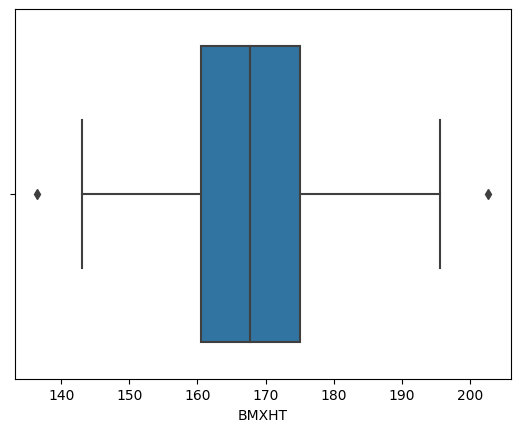

In [60]:
sns.boxplot(x=height_college_grads)

In [72]:
x2 = np.mean(height_non_college_grads)
x2 # mean value of height for non-graduated people

165.46651884700668

In [92]:
s2 = np.std(height_non_college_grads)
s2 # standard deviation of height for non-graduated people

10.172929745584598

<Axes: xlabel='BMXHT'>

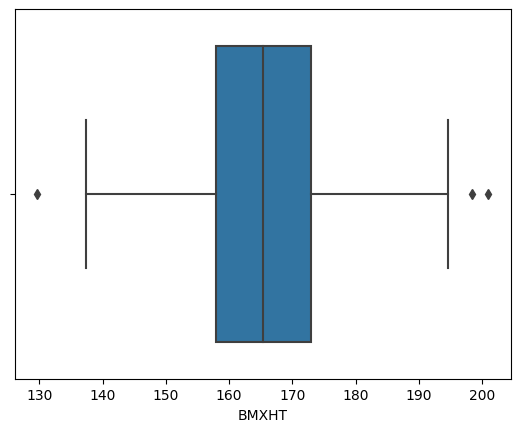

In [61]:
sns.boxplot(x=height_non_college_grads)

Since IQR's and standard deviations are quite similar we can go ahead with the **pooled approach**.

In [96]:
Sp = np.sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
) # pooled standard deviation
se = Sp * np.sqrt(1/n1 + 1/n2) # pooled standard error 
test_statistic = (x1 - x2) / se # test statistic

In [101]:
test_statistic # our difference in sample means is only 0.21 standard errors above the null difference

7.604094854752348

In [105]:
p_value = 2*(1 - t.cdf(test_statistic, n1 + n2 - 2))
p_value # p-value

3.352873534367973e-14

__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

$$
3.352873534367973e-14 < 0.05
$$

Thus we can reject the $H_0$. We can state that there is a statistically significant difference, between height values of those who graduated from college and those who didn't.

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

Changing the units of measurement in a dataset **shouldn't affect the outcome of a hypothesis test in terms of statistical significance**.

A change in units will affect both the mean and the standard deviation proportionally, leaving the test statistic unchanged. If the same data is converted to inches and you redo the t-test, the test statistic and p-value will remain identical because both the **mean and pooled variance vwill be scaled by the same factor**.

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

$$
H_0: \bar{x}_1 - \bar{x}_2 = 0
$$

In [116]:
age_interval_30_40 = df.loc[(df.RIDAGEYR >= 30) & (df.RIDAGEYR <= 40) & (df.RIAGENDRx == 'Male'), :] 
age_interval_30_40 # dataframe for men between 30 and 40 years old

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020x,RIAGENDRx
64,83856,1.0,NaN,1.0,1,1,30,3,1.0,4.0,...,89.1,181.5,27.0,43.5,41.6,33.4,99.1,2.0,Yes,Male
68,83863,1.0,NaN,3.0,2,1,35,1,2.0,3.0,...,95.8,175.6,31.1,39.2,40.3,35.6,104.6,NaN,No,Male
70,83866,1.0,NaN,2.0,1,1,40,4,1.0,4.0,...,88.0,169.3,30.7,42.0,37.0,39.5,93.0,NaN,Yes,Male
99,83910,1.0,NaN,8.0,1,1,37,3,1.0,3.0,...,73.2,178.9,22.9,40.6,40.3,32.3,81.1,NaN,Yes,Male
110,83931,1.0,NaN,2.0,1,1,37,2,1.0,2.0,...,78.7,174.0,26.0,42.9,38.8,34.8,89.0,NaN,Yes,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,93670,1.0,NaN,3.0,1,1,32,3,2.0,5.0,...,81.4,170.1,28.1,41.7,38.2,33.9,93.6,1.0,Yes,Male
5720,93675,1.0,NaN,1.0,2,1,38,5,2.0,5.0,...,77.6,179.0,24.2,42.3,41.5,31.7,94.2,2.0,No,Male
5725,93684,2.0,2.0,NaN,2,1,34,4,1.0,5.0,...,101.2,180.9,30.9,43.7,43.0,41.3,99.0,2.0,No,Male
5728,93690,1.0,NaN,3.0,2,1,32,2,1.0,2.0,...,89.5,164.9,32.9,40.0,38.0,39.0,101.0,2.0,No,Male


In [112]:
n1 = len(age_interval_30_40)
n1 # no. of men between 30 and 40 years old

494

In [109]:
age_interval_50_60 = df.loc[(df.RIDAGEYR >= 50) & (df.RIDAGEYR <= 60) & (df.RIAGENDRx == 'Male'), :]
age_interval_50_60 # dataframe for men between 50 and 60 years old

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020x,RIAGENDRx
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Yes,Male
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0,No,Male
24,83777,2.0,2.0,NaN,2,1,56,5,1.0,2.0,...,69.0,166.1,25.0,40.7,37.1,31.0,93.5,2.0,No,Male
28,83786,NaN,NaN,NaN,2,1,51,4,1.0,4.0,...,102.1,182.2,30.8,41.8,38.9,37.8,107.7,2.0,No,Male
32,83790,2.0,1.0,NaN,1,1,56,3,1.0,1.0,...,85.6,187.4,24.4,45.0,42.0,31.8,100.5,2.0,Yes,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,93571,1.0,NaN,2.0,2,1,53,3,1.0,5.0,...,69.4,175.1,22.6,43.2,38.6,31.2,79.7,2.0,No,Male
5663,93576,NaN,NaN,NaN,1,1,52,4,1.0,2.0,...,92.6,178.4,29.1,43.0,43.0,38.0,101.5,2.0,Yes,Male
5666,93581,2.0,2.0,NaN,2,1,50,3,1.0,5.0,...,73.6,181.8,22.3,42.6,36.1,29.2,90.5,2.0,No,Male
5680,93607,1.0,NaN,2.0,2,1,50,2,1.0,4.0,...,109.7,180.8,33.6,42.7,41.2,38.2,113.0,2.0,No,Male


In [113]:
n2 = len(age_interval_50_60)
n2 # no. of men between 50 and 60 years old

495

In [124]:
BMI_30_40 = age_interval_30_40['BMXBMI']
BMI_50_60 = age_interval_50_60['BMXBMI'] # extract BMI values from each dataframe

In [125]:
x1 = np.mean(BMI_30_40)
x1 # mean value of BMI column for men between 30 and 40 years old

29.61372950819672

In [126]:
s1 = np.std(BMI_30_40)
s1 # standard deviation of BMI values for men between 30 and 40 years old

6.6505050363344305

In [127]:
x2 = np.mean(BMI_50_60)
x2 # mean value of BMI column for men between 50 and 60 years old

29.25

In [128]:
s2 = np.std(BMI_50_60)
s2 # standard deviation of BMI values for men between 50 and 60 years old

5.996440339732189

In [129]:
Sp = np.sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
) # pooled standard deviation
se = Sp * np.sqrt(1/n1 + 1/n2) # pooled standard error 
test_statistic = (x1 - x2) / se # test statistic

In [132]:
test_statistic # our difference in sample means is about 0.90 standard errors above the null difference

0.9033030808042642

In [133]:
p_value = 2*(1 - t.cdf(test_statistic, n1 + n2 - 2))
p_value # p-value

0.3665854646678608

#### Log Transforming BMI Values

In [135]:
BMI_30_40 # BMI values for men between 30 and 40 years old

64      27.0
68      31.1
70      30.7
99      22.9
110     26.0
        ... 
5717    28.1
5720    24.2
5725    30.9
5728    32.9
5733    26.0
Name: BMXBMI, Length: 494, dtype: float64

In [136]:
log_BMI_30_40 = np.log(age_interval_30_40['BMXBMI'])
log_BMI_30_40 # logarithm in base e

64      3.295837
68      3.437208
70      3.424263
99      3.131137
110     3.258097
          ...   
5717    3.335770
5720    3.186353
5725    3.430756
5728    3.493473
5733    3.258097
Name: BMXBMI, Length: 494, dtype: float64

In [139]:
BMI_50_60 # BMI values for men between 50 and 60 years old

1       30.8
9       33.6
24      25.0
28      30.8
32      24.4
        ... 
5659    22.6
5663    29.1
5666    22.3
5680    33.6
5726    32.0
Name: BMXBMI, Length: 495, dtype: float64

In [140]:
log_BMI_50_60 = np.log(age_interval_50_60['BMXBMI'])
log_BMI_50_60 # logarithm in base e

1       3.427515
9       3.514526
24      3.218876
28      3.427515
32      3.194583
          ...   
5659    3.117950
5663    3.370738
5666    3.104587
5680    3.514526
5726    3.465736
Name: BMXBMI, Length: 495, dtype: float64

In [142]:
x1 = np.mean(log_BMI_30_40)
x2 = np.mean(log_BMI_50_60) # mean values
s1 = np.std(log_BMI_30_40)
s2 = np.std(log_BMI_50_60) # standard deviation values

Sp = np.sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
) # pooled standard deviation
se = Sp * np.sqrt(1/n1 + 1/n2) # pooled standard error 
test_statistic = (x1 - x2) / se # test statistic

test_statistic # our difference in sample means is about 0.70 standard errors above the null difference

0.7096737855753243

In [143]:
p_value = 2*(1 - t.cdf(test_statistic, n1 + n2 - 2))
p_value # p-value

0.47807406846160694

Note how the *log* transformation change the p-value.  

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

In both cases

$$
p-value > 0.05
$$

thus we fail at reject the null hypothesis $H_0$ that there is no significant difference betweeen the BMI of $30-40$ year old males and $50-60$ year old males.

**N o t e**\
A **non-linear transformation** changes the intrepretation of the data and thus it changes the analysis we are performing.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [146]:
age_interval_30_40 = df.loc[(df.RIDAGEYR >= 30) & (df.RIDAGEYR <= 40) & (df.RIAGENDRx == 'Female'), :] 
age_interval_30_40

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020x,RIAGENDRx
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0,No,Female
12,83752,1.0,NaN,2.0,1,2,30,2,1.0,4.0,...,71.2,163.6,26.6,37.3,35.7,31.0,90.7,2.0,Yes,Female
34,83799,NaN,NaN,NaN,2,2,37,2,1.0,4.0,...,66.6,161.6,25.5,NaN,NaN,NaN,NaN,2.0,No,Female
50,83828,1.0,NaN,2.0,2,2,39,1,2.0,3.0,...,71.3,162.0,27.2,36.8,34.6,29.1,94.6,NaN,No,Female
61,83851,2.0,1.0,1.0,1,2,37,3,1.0,3.0,...,85.1,155.3,35.3,32.5,33.6,36.1,106.5,1.0,Yes,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,93585,NaN,NaN,NaN,1,2,34,4,1.0,5.0,...,54.1,170.0,18.7,NaN,NaN,NaN,NaN,2.0,Yes,Female
5685,93612,2.0,2.0,NaN,2,2,36,5,1.0,5.0,...,65.7,162.4,24.9,37.2,36.0,29.8,89.0,2.0,No,Female
5715,93665,NaN,NaN,NaN,2,2,34,3,1.0,5.0,...,69.0,169.6,24.0,38.9,37.5,27.6,91.5,2.0,No,Female
5721,93676,1.0,NaN,2.0,2,2,35,4,1.0,5.0,...,92.2,161.7,35.3,41.5,37.5,38.9,110.9,2.0,No,Female


In [151]:
graduated_females_df = age_interval_30_40.loc[age_interval_30_40["DMDEDUC2"] == 5] # graduated females dataframe
BMI_graduated_females = graduated_females_df['BMXBMI'].dropna() # BMI values for graduated women between 30 and 40 years old

Text(0.5, 1.0, 'BMI Values for Graduated Women Between 30-40 y/o')

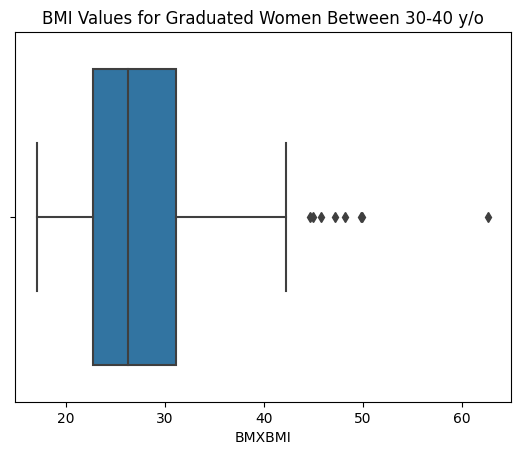

In [166]:
sns.boxplot(x=BMI_graduated_females)
plt.title("BMI Values for Graduated Women Between 30-40 y/o")

In [160]:
s1 = np.std(BMI_graduated_females)
s1 # standard deviation of BMI values for graduated women between 30 and 40 years old

7.336717137176925

In [157]:
not_graduated_females_df = age_interval_30_40[[x in [1,2,3,4] for x in age_interval_30_40["DMDEDUC2"]]] # not graduated females dataframe
BMI_not_graduated_females = not_graduated_females_df['BMXBMI'].dropna() # BMI values for graduated women between 30 and 40 years old

Text(0.5, 1.0, 'BMI Values for Non-Graduated Women Between 30-40 y/o')

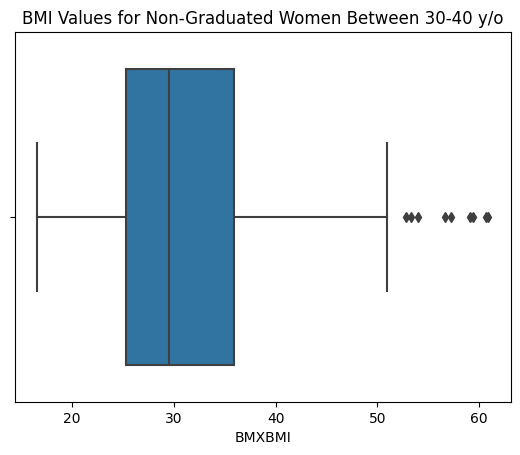

In [158]:
sns.boxplot(x=BMI_not_graduated_females)
plt.title("BMI Values for Non-Graduated Women Between 30-40 y/o")

In [161]:
s2 = np.std(BMI_not_graduated_females)
s2 # standard deviation of BMI values for not graduated women between 30 and 40 years old

8.244413603215772

The variance in BMI among women who have not graduated from college is higher than that of women who have graduated from college.

#### Test Assuming Equal Population Variances

Test for the null hypothesis that two independent samples have identical average (expected) values. Assuming that the populations have identical variances.

In [170]:
t_test = scipy.stats.ttest_ind(BMI_graduated_females, BMI_not_graduated_females, equal_var = True, nan_policy = "omit")
t_test # test considering a pooled variance

Ttest_indResult(statistic=-4.6439084509564195, pvalue=4.329847689653954e-06)

#### Test Assuming Non-Equal Population Variances

Test for the null hypothesis that two independent samples have identical average (expected) values. Assuming that the populations variances are not identical.

In [169]:
t_test = scipy.stats.ttest_ind(BMI_graduated_females, BMI_not_graduated_females, equal_var = False, nan_policy = "omit")
t_test # test considering an unpooled variance

Ttest_indResult(statistic=-4.833662355599097, pvalue=1.9620578582154297e-06)

__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

In both approaches, we can conclude that there is a significant difference in BMI between women aged 30 to 40 who have completed college and those in the same age group who have not.

$$
p-value < 0.05
$$

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [171]:
fst_dbp = df['BPXDI1'] # first diastolic blood pressure measurements
snd_dbp = df['BPXDI2'] # second diastolic blood pressure measurements

In [173]:
dbp_diff = fst_dbp - snd_dbp # difference between first and second measurements

In [176]:
se = np.std(dbp_diff)/np.sqrt(len(dbp_diff))
se # standard error of the differences

0.08155954223263553

In [177]:
test_statistic = np.mean(dbp_diff)/se
test_statistic # test statistic 

4.279582500882274

In [178]:
p_value = 2*(1 - t.cdf(test_statistic, len(dbp_diff) - 1))
p_value # p-value

1.9029430298855843e-05

$$
p-value < 0.05
$$

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

Given the results shown above we can say that there is a significant difference between the first and the second diastolic blood pressure measurements. 

In other words, there may be certain variables that affect individuals, causing diastolic blood pressure measurements to differ after a specific time interval.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modify the analysis above as appropriate for this setting.

In [179]:
scipy.stats.ttest_ind(fst_dbp, snd_dbp, equal_var = False, nan_policy = "omit")

Ttest_indResult(statistic=0.6849897545617214, pvalue=0.4933649090943151)

$$
p-value > 0.05
$$

We fail at reject $H_0$. We don't have sufficient evidence to conclude there is a significant difference between the first and the second diastolic measurements.

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceding two parts of the question differ.

In **Q5b** we assumed that the first and second diastolic measurements came from two different populations. As a result, we tested a completely different hypothesis, which explains the variation in p-values and the different conclusions drawn.